# Q1: Simulation of a Standard Wiener Process


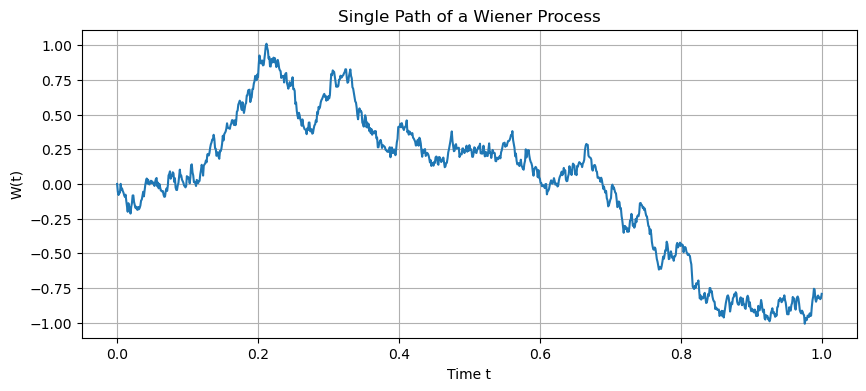

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1.0       # Total time
N = 1000      # Number of time steps
dt = T / N    # Time step size
t = np.linspace(0, T, N+1)

# Brownian increments
dW = np.sqrt(dt) * np.random.randn(N)
W = np.concatenate([[0], np.cumsum(dW)])  # Wiener path

# Plot
plt.figure(figsize=(10, 4))
plt.plot(t, W)
plt.title("Single Path of a Wiener Process")
plt.xlabel("Time t")
plt.ylabel("W(t)")
plt.grid(True)
plt.show()


# Q2: Geometric Brownian Motion Simulation


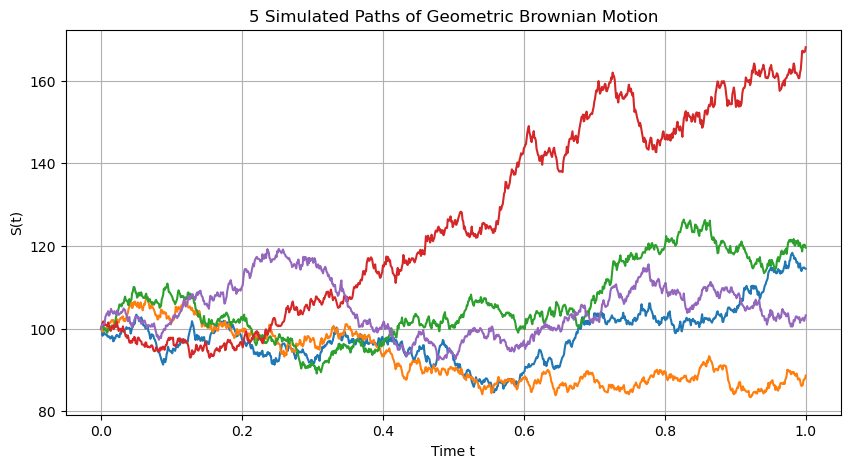

In [13]:
# Parameters
alpha = 0.05
sigma = 0.2
S0 = 100

# Function to simulate one path
def geometric_brownian_motion(T, N, S0, alpha, sigma):
    dt = T / N
    t = np.linspace(0, T, N+1)
    dW = np.sqrt(dt) * np.random.randn(N)
    W = np.concatenate([[0], np.cumsum(dW)])
    S = S0 * np.exp(sigma * W + (alpha - 0.5 * sigma**2) * t)
    return t, S

# Plot multiple paths
plt.figure(figsize=(10, 5))
for _ in range(5):
    t, S = geometric_brownian_motion(T, N, S0, alpha, sigma)
    plt.plot(t, S)

plt.title("5 Simulated Paths of Geometric Brownian Motion")
plt.xlabel("Time t")
plt.ylabel("S(t)")
plt.grid(True)
plt.show()


# 3. Verify that $ E[W_s W_t] = \min(s, t) $


In [14]:
simulations = 10000
s, t = 1.0, 2.0  # s < t

# Generate Brownian paths at s and t
W_s = np.random.normal(0, np.sqrt(s), size=simulations)
W_t = W_s + np.random.normal(0, np.sqrt(t - s), size=simulations)  # Since W_t = W_s + (W_t - W_s)

expected_value = np.mean(W_s * W_t)

print(f"Empirical E[W_s W_t] ≈ {expected_value:.4f}")
print(f"Expected (theoretical) value = min(s, t) = {min(s, t)}")


Empirical E[W_s W_t] ≈ 1.0036
Expected (theoretical) value = min(s, t) = 1.0


# 4. Show that $ W_t - W_s \sim N(0, t-s) $


In [15]:
s, t = 2.0, 5.0
simulations = 10000

# Simulate increments
W_s = np.random.normal(0, np.sqrt(s), size=simulations)
W_t = W_s + np.random.normal(0, np.sqrt(t - s), size=simulations)
increments = W_t - W_s

# Mean and variance of the increment
mean_increment = np.mean(increments)
var_increment = np.var(increments)

print(f"Empirical mean of W_t - W_s ≈ {mean_increment:.4f}")
print(f"Empirical variance of W_t - W_s ≈ {var_increment:.4f} (expected = {t - s})")

# Independence test: Correlation between W_s and W_t - W_s (should be ≈ 0)
correlation = np.corrcoef(W_s, increments)[0, 1]
print(f"Correlation between W_s and (W_t - W_s): {correlation:.4f} (≈ 0 implies independence)")

Empirical mean of W_t - W_s ≈ 0.0291
Empirical variance of W_t - W_s ≈ 2.9532 (expected = 3.0)
Correlation between W_s and (W_t - W_s): -0.0089 (≈ 0 implies independence)


# 5. Verify that $ E[W_t \mid \mathcal{F}_s] = W_s$ and Martingle Property

In [16]:
s, t = 1.0, 3.0
simulations = 10000

# W_s is fixed for each simulation, W_t depends on W_s
W_s = np.random.normal(0, np.sqrt(s), size=simulations)
W_t = W_s + np.random.normal(0, np.sqrt(t - s), size=simulations)

# Compute conditional expectation: E[W_t | W_s] ≈ W_s
conditional_diff = W_t - W_s
mean_conditional = np.mean(conditional_diff)

print(f"Empirical E[W_t - W_s] ≈ {mean_conditional:.4f}")
print(f"Therefore, E[W_t | F_s] ≈ W_s ⇒ Brownian motion is a martingale.")

Empirical E[W_t - W_s] ≈ 0.0102
Therefore, E[W_t | F_s] ≈ W_s ⇒ Brownian motion is a martingale.
